## **AirBnB Price in European Cities**  Stage 2

### Team FinPro-8 InsightSeekers :

1.	Risanto Darmawan
2.	Asri Nur Azizah
3.	Fransiska Angelina
4.	Naufa Tasha Nabila

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, MinMaxScaler

In [ ]:
from google.colab import files

uploaded = files.upload()

## Import Data

In [ ]:
#1 Amsterdam
amsterdam_weekdays = pd.read_csv('amsterdam_weekdays.csv')
amsterdam_weekends = pd.read_csv('amsterdam_weekends.csv')
#2 Athens
athens_weekdays = pd.read_csv('athens_weekdays.csv')
athens_weekends = pd.read_csv('athens_weekends.csv')
#3 Barcelona
barcelona_weekdays = pd.read_csv('barcelona_weekdays.csv')
barcelona_weekends = pd.read_csv('barcelona_weekends.csv')
#4 Berlin
berlin_weekdays = pd.read_csv('berlin_weekdays.csv')
berlin_weekends = pd.read_csv('berlin_weekends.csv')
#5 Budapest
budapest_weekdays = pd.read_csv('budapest_weekdays.csv')
budapest_weekends = pd.read_csv('budapest_weekends.csv')
#6 Lisbon
lisbon_weekdays = pd.read_csv('lisbon_weekdays.csv')
lisbon_weekends = pd.read_csv('lisbon_weekends.csv')
#7 London
london_weekdays = pd.read_csv('london_weekdays.csv')
london_weekends = pd.read_csv('london_weekends.csv')
#8 Paris
paris_weekdays = pd.read_csv('paris_weekdays.csv')
paris_weekends = pd.read_csv('paris_weekends.csv')
#9 Rome
rome_weekdays = pd.read_csv('rome_weekdays.csv')
rome_weekends = pd.read_csv('rome_weekends.csv')
#10 Vienna
vienna_weekdays = pd.read_csv('vienna_weekdays.csv')
vienna_weekends = pd.read_csv('vienna_weekends.csv')

In [ ]:
print('amsterdam_weekdays shape = ' + str(amsterdam_weekdays.shape))
print('amsterdam_weekends shape = ' + str(amsterdam_weekends.shape))
print('athens_weekdays shape = ' + str(athens_weekdays.shape))
print('athens_weekends shape = ' + str(athens_weekends.shape))
print('barcelona_weekdays shape = ' + str(barcelona_weekdays.shape))
print('barcelona_weekends shape = ' + str(barcelona_weekends.shape))
print('berlin_weekdays shape = ' + str(berlin_weekdays.shape))
print('berlin_weekends shape = ' + str(berlin_weekends.shape))
print('budapest_weekdays shape = ' + str(budapest_weekdays.shape))
print('budapest_weekends shape = ' + str(budapest_weekends.shape))
print('lisbon_weekdays shape = ' + str(lisbon_weekdays.shape))
print('lisbon_weekends shape = ' + str(lisbon_weekends.shape))
print('london_weekdays shape = ' + str(london_weekdays.shape))
print('london_weekends shape = ' + str(london_weekends.shape))
print('paris_weekdays shape = ' + str(paris_weekdays.shape))
print('paris_weekends shape = ' + str(paris_weekends.shape))
print('rome_weekdays shape = ' + str(rome_weekdays.shape))
print('rome_weekends shape = ' + str(rome_weekends.shape))
print('vienna_weekdays shape = ' + str(vienna_weekdays.shape))
print('vienna_weekends shape = ' + str(vienna_weekends.shape))

amsterdam_weekdays shape = (1103, 20)
amsterdam_weekends shape = (977, 20)
athens_weekdays shape = (2653, 20)
athens_weekends shape = (2627, 20)
barcelona_weekdays shape = (1555, 20)
barcelona_weekends shape = (1278, 20)
berlin_weekdays shape = (1284, 20)
berlin_weekends shape = (1200, 20)
budapest_weekdays shape = (2074, 20)
budapest_weekends shape = (1948, 20)
lisbon_weekdays shape = (2857, 20)
lisbon_weekends shape = (2906, 20)
london_weekdays shape = (4614, 20)
london_weekends shape = (5379, 20)
paris_weekdays shape = (3130, 20)
paris_weekends shape = (3558, 20)
rome_weekdays shape = (4492, 20)
rome_weekends shape = (4535, 20)
vienna_weekdays shape = (1738, 20)
vienna_weekends shape = (1799, 20)


In [ ]:
amsterdam_weekdays.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')

#### Insight =
- Dari seluruh dataset, masing-masing kota memiliki kolom/features yang sama yaitu sebanyak 20 kolom yang terdiri dari Unnamed, realSum, room_type, room_shared, room_private,person_capacity, host_is_superhost, multi, biz, cleanliness_rating, guest_satisfaction_overall, bedrooms, dist, metro_dist, attr_index, attr_index_norm, rest_index, rest_index_norm, lng, dan lat.
- Masing-masing dataset memiliki jumlah baris yang berbeda.
- Dengan jumlah kolom yang sama namun jumlah baris yang berbeda dapat dilakukan combine seluruh dataset menjadi satu dataset dengan menambahkan kolom baru yang berisi keterangan kota (city) dan kategori hari (week_time).

## Combine Data

In [ ]:
def combine(csv_1,col_1,csv_2,col_2,city): # Dictionary untuk menggabungkan weekdays dan weekend tiap kota
    csv_1['week_time'] = col_1
    csv_2['week_time'] = col_2
    csv_1.drop(columns = ['Unnamed: 0'],inplace=True)
    csv_2.drop(columns = ['Unnamed: 0'],inplace=True)
    merged = pd.concat([csv_1, csv_2])
    merged['city'] = city
    return merged

In [ ]:
amsterdam = combine(amsterdam_weekdays,'weekdays',amsterdam_weekends,'weekends','amsterdam')
athens = combine(athens_weekdays,'weekdays',athens_weekends,'weekends','athens')
barcelona = combine(barcelona_weekdays,'weekdays',barcelona_weekends,'weekends','barcelona')
berlin = combine(berlin_weekdays,'weekdays',berlin_weekends,'weekends','berlin')
budapest = combine(budapest_weekdays,'weekdays',budapest_weekends,'weekends','budapest')
lisbon = combine(lisbon_weekdays,'weekdays',lisbon_weekends,'weekends','lisbon')
london = combine(london_weekdays,'weekdays',london_weekends,'weekends','london')
paris = combine(paris_weekdays,'weekdays',paris_weekends,'weekends','paris')
rome = combine(rome_weekdays,'weekdays',rome_weekends,'weekends','rome')
vienna = combine(vienna_weekdays,'weekdays',vienna_weekends,'weekends','vienna')

In [ ]:
cities_names = ['amsterdam', 'athens', 'barcelona', 'berlin', 'budapest', 'lisbon', 'london', 'paris', 'rome', 'vienna']
cities = [amsterdam, athens, barcelona, berlin, budapest, lisbon, london, paris, rome, vienna]

In [ ]:
europe = pd.concat(cities, ignore_index=True) #menggabungkan seluruh dataset

In [ ]:
europe.sample(5)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_time,city
24831,157.811802,Private room,False,True,2.0,False,0,0,10.0,92.0,...,4.927948,2.361254,234.916041,16.329275,438.956785,7.859888,-0.07612,51.47779,weekdays,london
35969,276.353807,Entire home/apt,False,False,2.0,False,0,0,9.0,86.0,...,1.060672,0.181118,419.207119,20.383977,1067.882268,49.263899,2.36008,48.86479,weekends,paris
25168,456.266610,Entire home/apt,False,False,4.0,False,0,0,9.0,95.0,...,3.818739,0.463347,305.225753,21.216581,724.206547,12.967523,-0.08436,51.52961,weekdays,london
7192,170.599677,Entire home/apt,False,False,4.0,True,0,1,10.0,100.0,...,2.108826,0.600433,72.003447,2.712927,103.948904,1.552367,23.75809,37.98172,weekends,athens
6456,168.021934,Private room,False,True,2.0,True,1,0,10.0,99.0,...,0.900604,0.458920,125.253347,4.719263,195.003624,2.912172,23.74409,37.97985,weekends,athens


In [ ]:
europe.shape

(51707, 21)

## Data Exploration

### 1. Descriptive Statistics

In [ ]:
numerical = ['realSum', 'person_capacity', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat']
categorical = ['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'week_time', 'city']

In [ ]:
europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

Apabila kita lebih teliti lagi dari isi dataset yang ada dan info yang diberikan terdapat beberapa kolom yang harus dilakukan perubahan dataset untuk memudahkan dalam kegiatan analisis nantinya seperti:  
- kolom room_type bisa dilakukan perubahan dari object (private room, shared room, entire home/apt) dilakukan encoding menjadi angka dan tipe data dilakukan perubahan dari object menjadi int64.    
- kolom room_shared, room_private, dan host_is_superhost bisa dilakukan perubahan isi kolom yang semula TRUE FALSE menjadi angka (1 dan 0) dengan mengubah tipe data boolean menjadi int64.    
- kolom person_capacity bisa dilakukan perubahan tipe data menjadi int64 karena isi dalam kolom tersebut merupakan angka bulat.    
- kolom cleanliness_rating dan guest_satisfaction_overall bisa dilakukan perubahan tipe data dari float64 menjadi int64 karena data yang terdapat dalam kolom tidak ada angka di belakang koma.    
- kolom week bisa dilakukan encoding dengan mengubah weekend dan weekday menjadi angka 1 dan 0. Selain itu, dilakukan perubahan tipe data dari object menjadi int64.    
- kolom city bisa dilakukan encoding dengan mengubah semua nama kota menjadi angka. Selain itu, dilakukan perubahan tipe data dari object menjadi int64.    
- kolom unnamed:0 bisa dilakukan drop kolom karena tidak memiliki pengaruh terhadap fitur lain.    

In [ ]:
europe[numerical].describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410


#### KESIMPULAN DARI DESCRIBE  
- kolom realSum memiliki jarak yang cukup jauh antara nilai mean dan nilai max. Hal ini dapat berakibat adanya outlier yang akan mempengaruhi hasil analisis. Mungkin dapat dilakukan peruabahan angka dalam kolom tersebut menjadi log untuk meminimalisir pengaruh outlier.  
- kolom cleanliness_rating memiliki jarak yang cukup dekat antara nilai mean dan nilai max. Hal ini mengindikasikan rating yang diberikan oleh customer paling banyak diberikan pada rentang nilai 8-10. Perlu dilakukan analisis lebih lanjut untuk tahu apakah bias atau tidak.  
- kolom guest_satisfaction_overall memiliki jarak yang cukup dekat antara nilai mean dan nilai max. Hal ini mengindikasikan tingkat kepuasan yang diberikan oleh customer paling banyak diberikan pada nilai yang tinggi (87-100). Perlu dilakukan analisis lebih lanjut untuk tahu apakah bias atau tidak.  
- kolom dist  memiliki rentan jarakg yang cukup besa, dari 0.01 hingga 25.28.Setiap penginapan memiliki jarak yang berbeda dengan pusat kota dan hal ini menunjukkan bahwa terdapat penginapan yang sangat dekat dengan pusat kota dan sangat jaauh dari pusat kota. .e. kolom metro_dist memiliki rentang jarak yang cukup besar dari 0.002 hingga 14.27. Ini adalah jarak dari akomodasi yang ada di sekitar penginapan tersebut. Hal ini menunjukkan adanya penginapan yang jaraknya sangat dekat hingga terjauh dari transportasi publik.  
- kolom attr_index, attr_index_norm, rest_index, dan rest_index_norm bisa dianggap sebagai outlier karena adanya rentang nilai mean dan max. Ini bisa menjadi properti yang berlokasi di area yang sangat dekat dengan banyak atraksi atau restoran.  
- Nilai mean dan median yang cukup berbeda, terutama di kolom attr_index_norm dan rest_index_norm, menunjukkan distribusi yang cenderung condong ke bawah, dengan sebagian besar properti tidak memiliki akses maksimal.  

In [ ]:
europe[categorical].describe()

,room_type,room_shared,room_private,host_is_superhost,week_time,city
count,51707,51707,51707,51707,51707,51707
unique,3,2,2,2,2,10
top,Entire home/apt,False,False,False,weekends,london
freq,32648,51341,33014,38475,26207,9993


In [ ]:
europe.isnull().sum()

,0
realSum,0
room_type,0
room_shared,0
room_private,0
person_capacity,0
host_is_superhost,0
multi,0
biz,0
cleanliness_rating,0
guest_satisfaction_overall,0


Tidak ada data yang memiliki data kosong.

In [ ]:
print(f'realSum : {europe.realSum.nunique()}')
print(f'room_type : {europe.room_type.nunique()}')
print(f'room_shared : {europe.room_shared.nunique()}')
print(f'room_private : {europe.room_private.nunique()}')
print(f'person_capacity : {europe.person_capacity.nunique()}')
print(f'host_is_superhost : {europe.host_is_superhost.nunique()}')
print(f'multi : {europe.multi.nunique()}')
print(f'biz : {europe.biz.nunique()}')
print(f'cleanliness_rating : {europe.cleanliness_rating.nunique()}')
print(f'guest_satisfaction_overall : {europe.guest_satisfaction_overall.nunique()}')
print(f'bedrooms : {europe.bedrooms.nunique()}')
print(f'dist : {europe.dist.nunique()}')
print(f'metro_dist : {europe.metro_dist.nunique()}')
print(f'attr_index : {europe.attr_index.nunique()}')
print(f'attr_index_norm : {europe.attr_index_norm.nunique()}')
print(f'rest_index  : {europe.rest_index.nunique()}')
print(f'rest_index_norm : {europe.rest_index_norm.nunique()}')
print(f'lng : {europe.lng.nunique()}')
print(f'lat : {europe.lat.nunique()}')
print(f'week_time : {europe.week_time.nunique()}')
print(f'city : {europe.city.nunique()}')

realSum : 10497
room_type : 3
room_shared : 2
room_private : 2
person_capacity : 5
host_is_superhost : 2
multi : 2
biz : 2
cleanliness_rating : 9
guest_satisfaction_overall : 53
bedrooms : 10
dist : 51707
metro_dist : 51707
attr_index : 51707
attr_index_norm : 51688
rest_index  : 51707
rest_index_norm : 51688
lng : 23600
lat : 21484
week_time : 2
city : 10


### 2. Univariate Analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
europe['person_capacity'].unique()

array([2., 4., 3., 6., 5.])

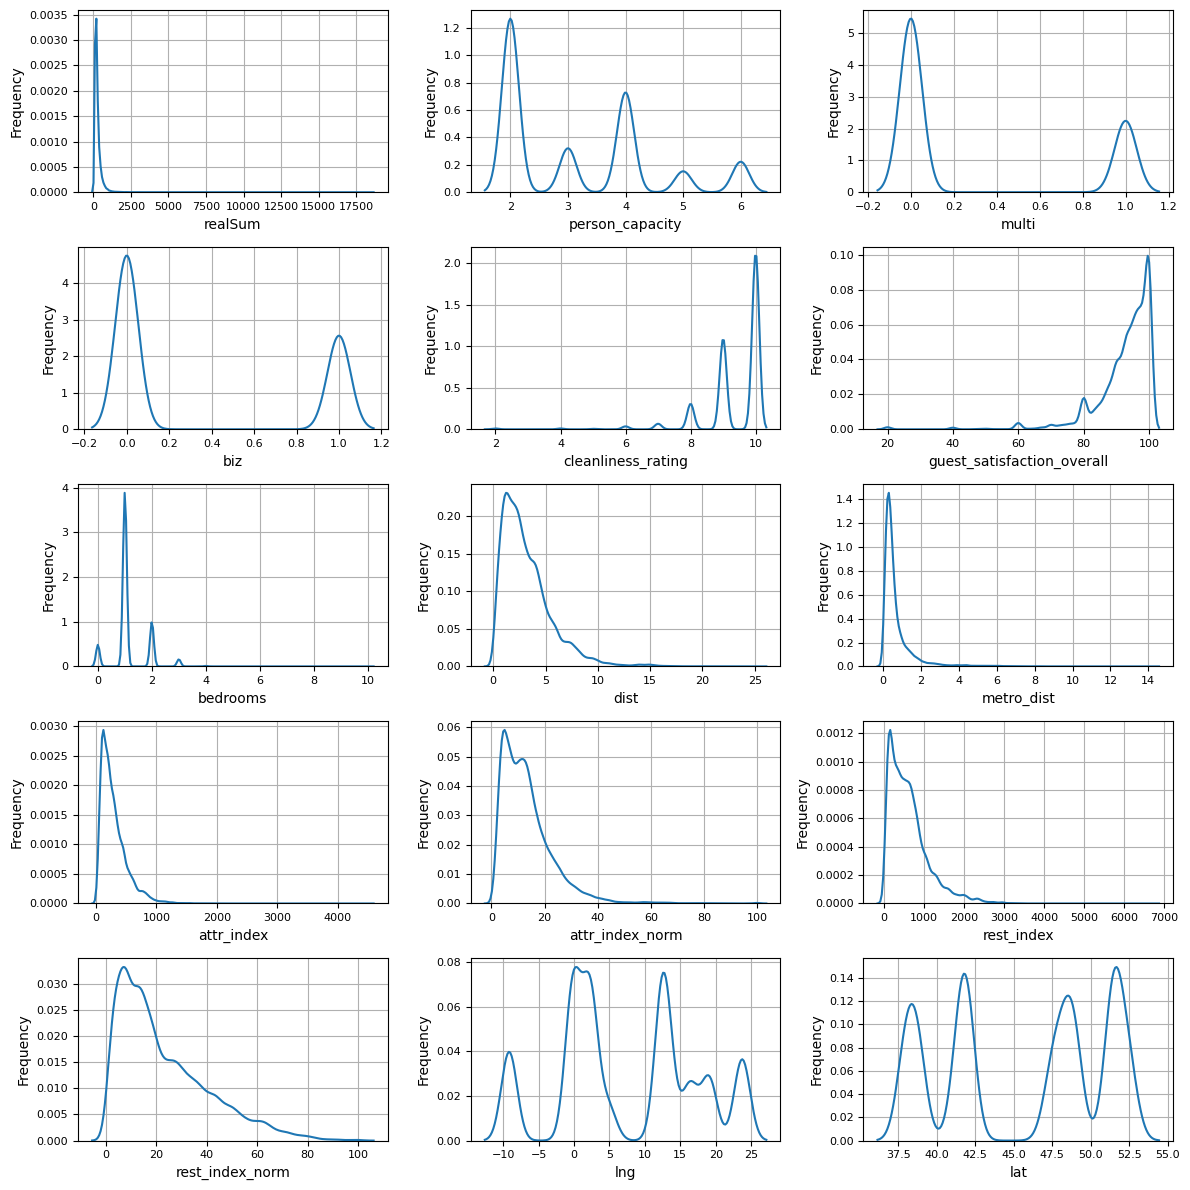

In [ ]:
features = numerical
rcParams['figure.figsize'] = 12, 12
for i in range(0, len(features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=europe[features[i]],)
    plt.xlabel(features[i])
    plt.ylabel('Frequency')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid()
    plt.tight_layout()

plt.savefig('univariate.png')

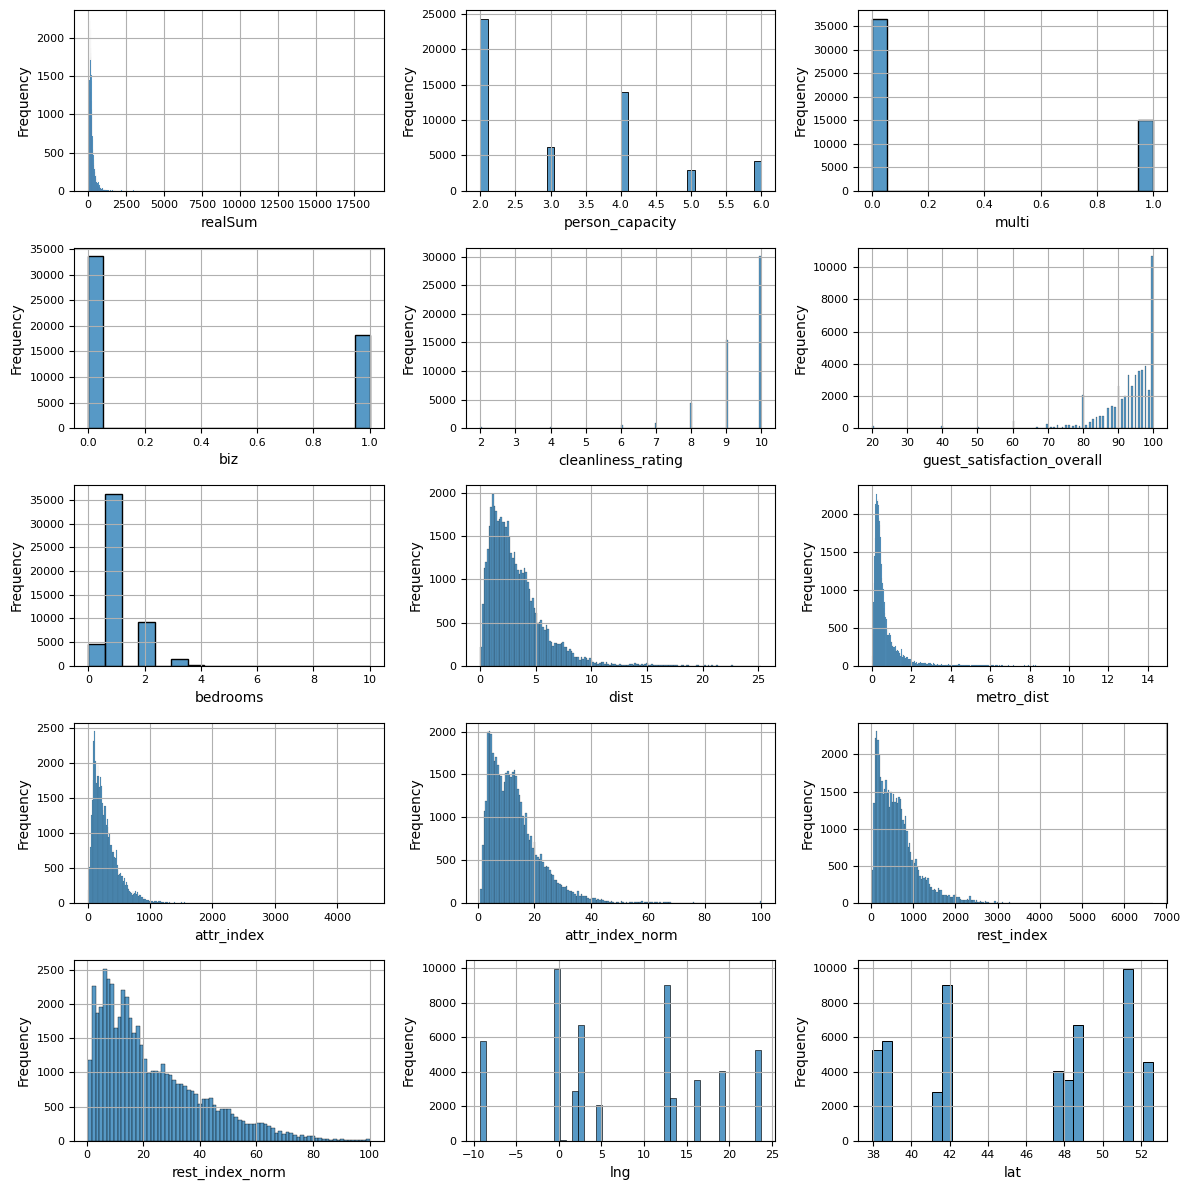

In [ ]:
features = numerical
rcParams['figure.figsize'] = 12, 12
for i in range(0, len(features)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=europe[features[i]],)
    plt.xlabel(features[i])
    plt.ylabel('Frequency')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid()
    plt.tight_layout()

plt.savefig('hist.png')

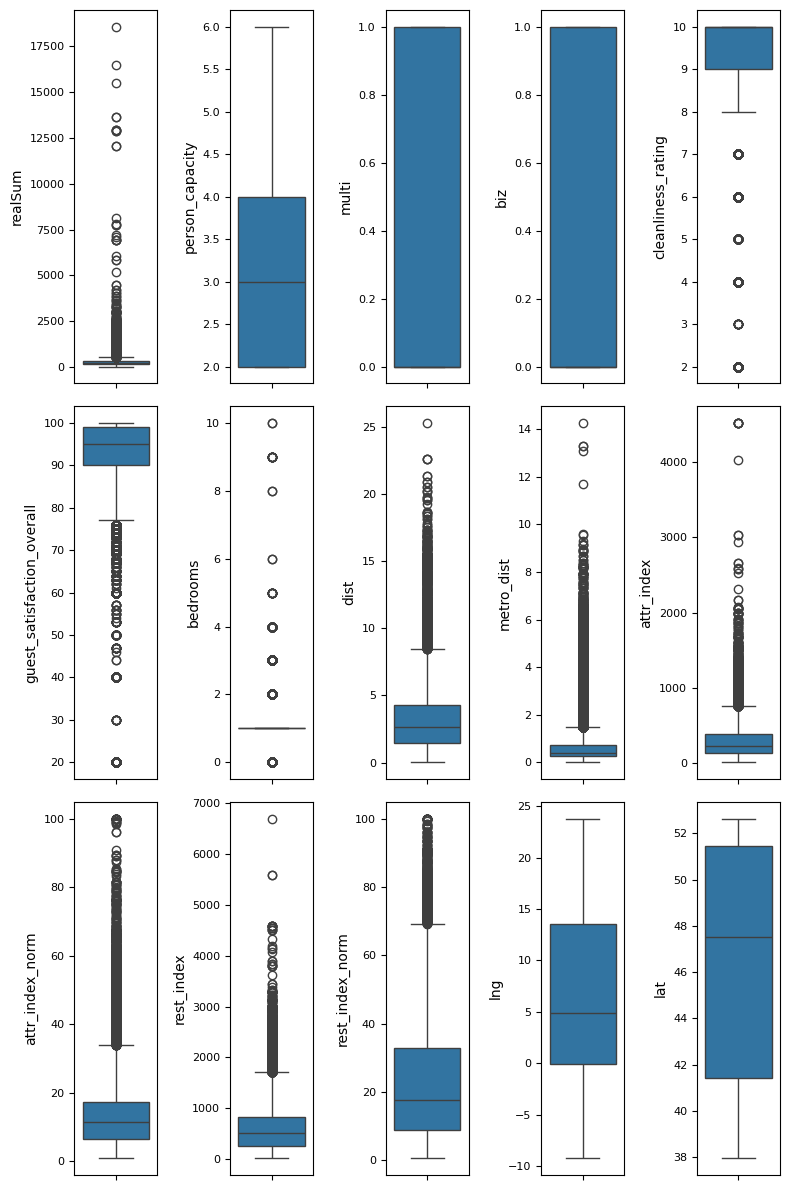

In [ ]:
features = numerical
rcParams['figure.figsize'] = 8, 12
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=europe[features[i]])
    plt.ylabel(features[i])
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tight_layout()
plt.savefig('box.png')

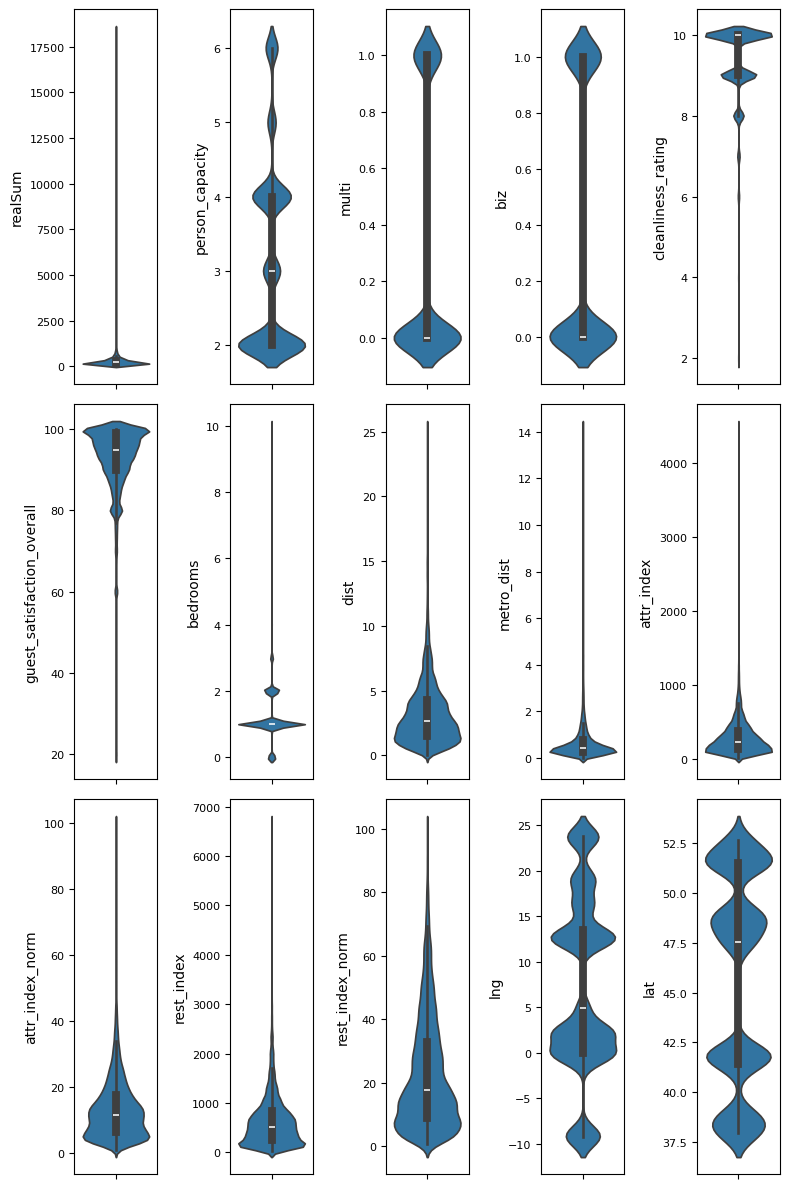

In [ ]:
features = numerical
rcParams['figure.figsize'] = 8, 12
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y=europe[features[i]])
    plt.ylabel(features[i])
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tight_layout()

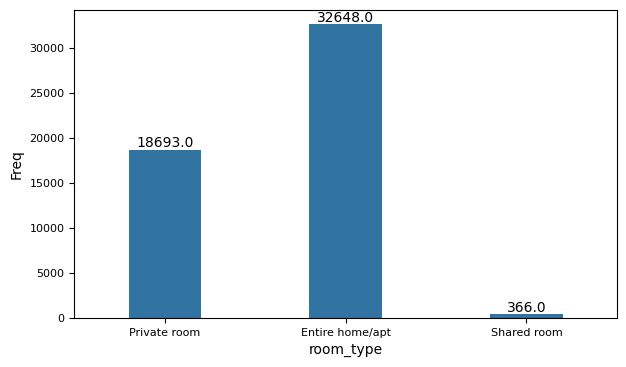

In [ ]:
rcParams['figure.figsize'] = 7, 4
sns.countplot(x='room_type', data= europe, width = 0.4)
plt.ylabel('Freq')
plt.tick_params(axis='both', which='major', labelsize=8)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

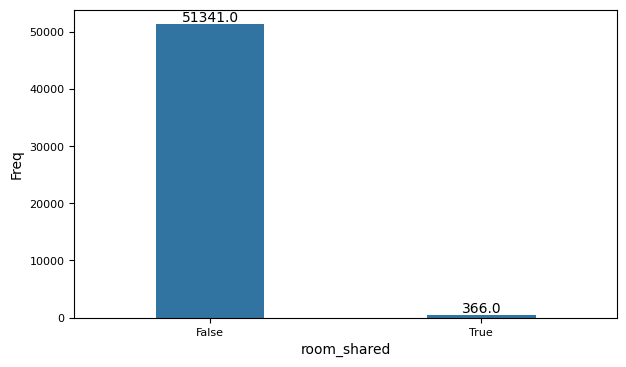

In [ ]:
rcParams['figure.figsize'] = 7, 4
sns.countplot(x='room_shared', data= europe, width = 0.4)
plt.ylabel('Freq')
plt.tick_params(axis='both', which='major', labelsize=8)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
plt.show()

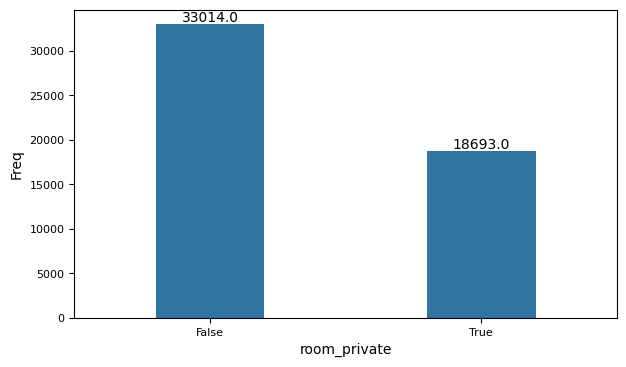

In [ ]:
rcParams['figure.figsize'] = 7, 4
sns.countplot(x='room_private', data= europe, width = 0.4)
plt.ylabel('Freq')
plt.tick_params(axis='both', which='major', labelsize=8)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
plt.show()

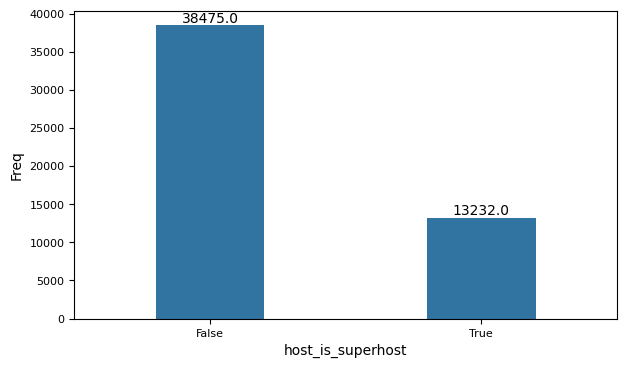

In [ ]:
rcParams['figure.figsize'] = 7, 4
sns.countplot(x='host_is_superhost', data= europe, width = 0.4)
plt.ylabel('Freq')
plt.tick_params(axis='both', which='major', labelsize=8)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
plt.show()

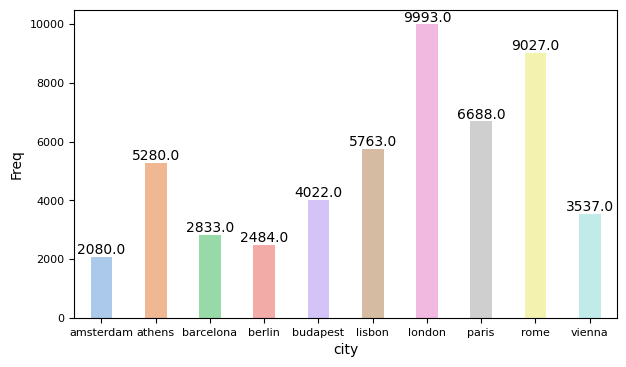

In [ ]:
rcParams['figure.figsize'] = 7, 4
sns.countplot(x='city', data= europe, hue = 'city', width = 0.4, palette = 'pastel', legend=False)
plt.ylabel('Freq')
plt.tick_params(axis='both', which='major', labelsize=8)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
plt.show()

### 2. Multivariate Analysis

### Feature and Target Relation

In [ ]:
duplicates_all = europe[europe.duplicated(keep=False)]
print(duplicates_all)

Empty DataFrame
Columns: [realSum, room_type, room_shared, room_private, person_capacity, host_is_superhost, multi, biz, cleanliness_rating, guest_satisfaction_overall, bedrooms, dist, metro_dist, attr_index, attr_index_norm, rest_index, rest_index_norm, lng, lat, week_time, city]
Index: []

[0 rows x 21 columns]


In [ ]:
europe[numerical].corr()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
realSum,1.000000,0.203077,-0.052926,0.037144,-0.006082,-0.001888,0.221653,-0.044725,-0.061025,0.178228,0.292396,0.134722,0.144094,-0.173833,0.211805
person_capacity,0.203077,1.000000,-0.054326,0.110668,0.003256,0.005181,0.560627,-0.128488,-0.037267,0.028394,-0.050487,0.037330,0.038059,0.146848,-0.168265
multi,-0.052926,-0.054326,1.000000,-0.470725,0.041064,0.054254,-0.000659,0.033426,0.043365,0.006319,-0.041412,0.007051,-0.037402,0.041260,-0.034058
biz,0.037144,0.110668,-0.470725,1.000000,-0.107310,-0.208160,-0.026741,-0.164767,-0.109153,0.114732,0.093720,0.137747,0.083999,-0.088943,-0.126433
cleanliness_rating,-0.006082,0.003256,0.041064,-0.107310,1.000000,0.714045,0.033489,-0.030202,0.010441,-0.025322,-0.075372,-0.031929,-0.005995,0.120379,-0.092502
guest_satisfaction_overall,-0.001888,0.005181,0.054254,-0.208160,0.714045,1.000000,0.047573,-0.004178,0.029788,-0.050624,-0.074146,-0.069319,-0.008765,0.156079,-0.033957
bedrooms,0.221653,0.560627,-0.000659,-0.026741,0.033489,0.047573,1.000000,-0.006262,0.044431,-0.011735,-0.063773,-0.014047,-0.057726,0.013688,-0.104694
dist,-0.044725,-0.128488,0.033426,-0.164767,-0.030202,-0.004178,-0.006262,1.000000,0.558064,-0.363088,-0.242862,-0.346653,-0.467791,-0.147424,0.405878
metro_dist,-0.061025,-0.037267,0.043365,-0.109153,0.010441,0.029788,0.044431,0.558064,1.000000,-0.168010,-0.219587,-0.138876,-0.259654,-0.069506,0.086424
attr_index,0.178228,0.028394,0.006319,0.114732,-0.025322,-0.050624,-0.011735,-0.363088,-0.168010,1.000000,0.714847,0.850229,0.544403,-0.126942,-0.052438


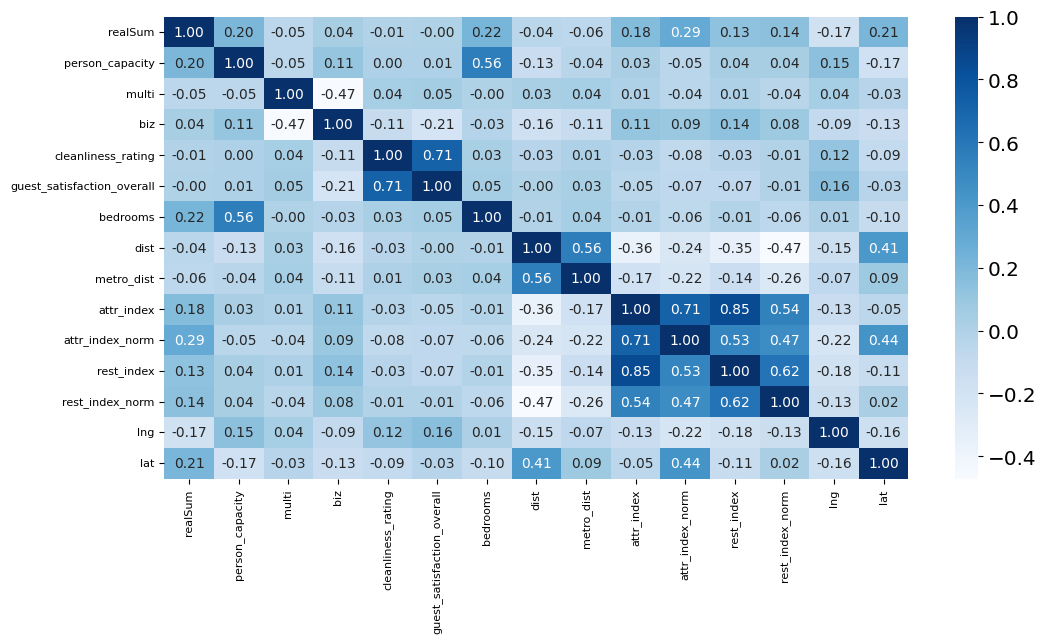

In [ ]:
rcParams['figure.figsize'] = 12, 6
sns.heatmap(europe[numerical].corr(),cmap='Blues', annot=True, fmt = '.2f')
plt.tick_params(axis='both', which='major', labelsize=8)

### Antar Feature

In [ ]:
room_type_values = europe[['room_type', 'city']].value_counts().reset_index()
person_capacity = europe[['person_capacity', 'city']].value_counts().reset_index()

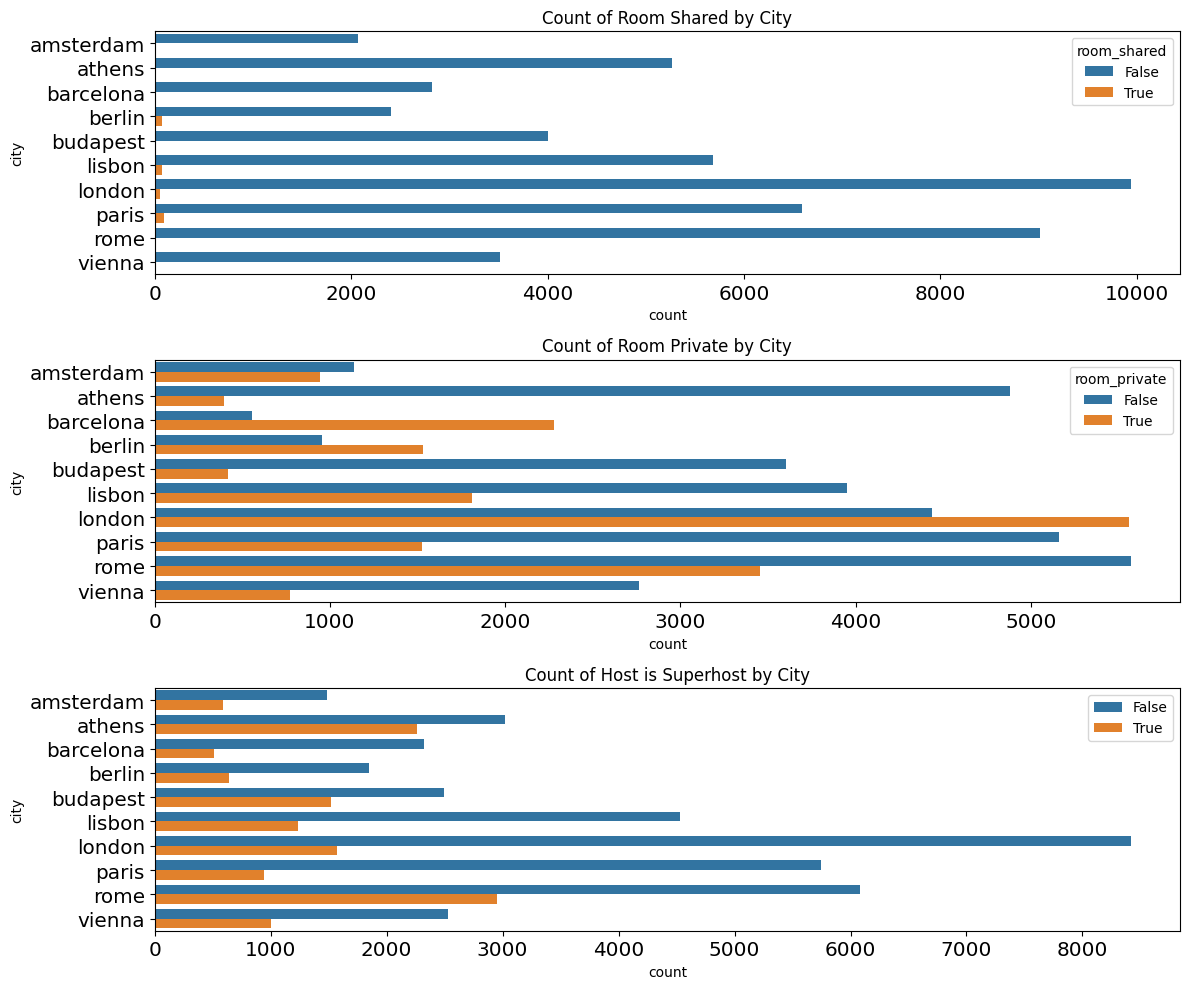

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10))
sns.countplot(y='city', data=europe, hue='room_shared', ax=ax[0])
ax[0].set_title('Count of Room Shared by City')
sns.countplot(y='city', data=europe, hue='room_private', ax=ax[1])
ax[1].set_title('Count of Room Private by City')
sns.countplot(y='city', data=europe, hue='host_is_superhost', ax=ax[2])
ax[2].set_title('Count of Host is Superhost by City')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [ ]:
meanprices=europe.groupby(['city','week_time']).realSum.mean().reset_index().sort_values(by=['realSum'])
meanprices=meanprices.rename(columns={'realSum':'mean_price'})

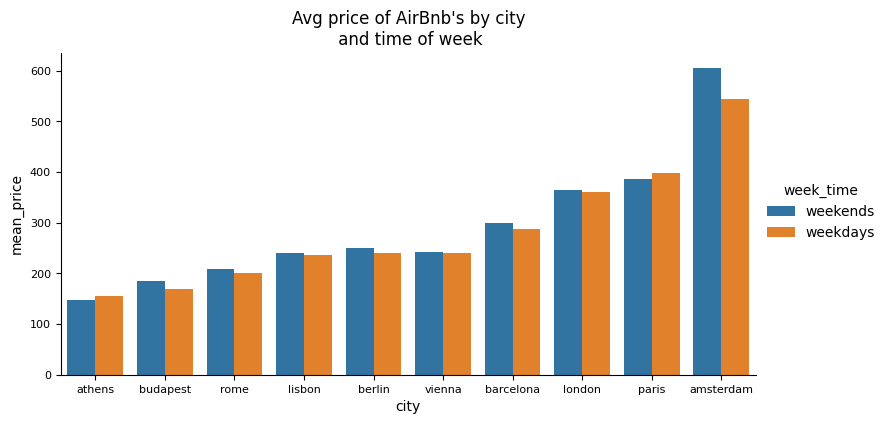

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.catplot(x='city',y='mean_price',hue='week_time',data=meanprices,
           height=4, aspect=2,kind='bar')
plt.title('Avg price of AirBnb\'s by city\n and time of week')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()
plt.clf()

In [ ]:
number_of_room=europe.groupby(['room_type','person_capacity']).realSum.count().reset_index().sort_values(by=['realSum'])
number_of_room=number_of_room.rename(columns={'realSum':'number_of_room'})

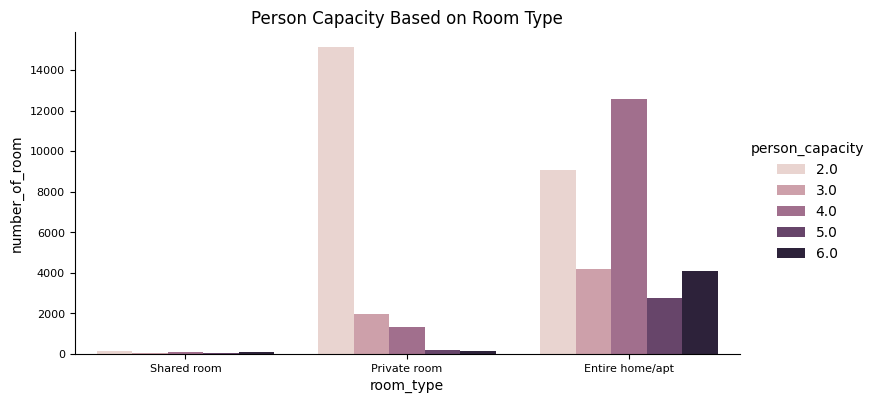

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.catplot(x='room_type',y='number_of_room',hue='person_capacity',data=number_of_room,
           height=4, aspect=2,kind='bar')
plt.title('Person Capacity Based on Room Type')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()
plt.clf()

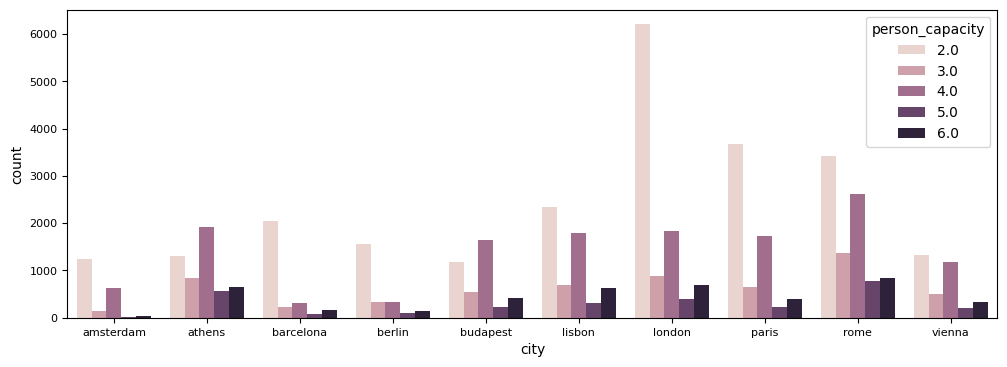

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sns.countplot(x='city',data=europe, hue='person_capacity')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

In [ ]:
avg_by_room=europe.groupby(['room_type']).realSum.mean().reset_index().sort_values(by=['realSum'])
avg_by_room=avg_by_room.rename(columns={'realSum':'avg_by_room'})

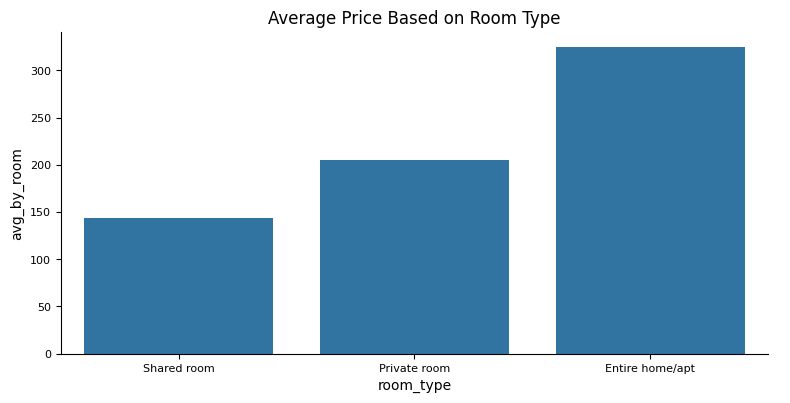

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.catplot(x='room_type',y='avg_by_room',data=avg_by_room,
           height=4, aspect=2,kind='bar')
plt.title('Average Price Based on Room Type')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()
plt.clf()

## Data Pre Processing

### Data Type Conversion

In [ ]:
europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

In [ ]:
europe['person_capacity'] = europe['person_capacity'].astype(int)
europe['cleanliness_rating'] = europe['cleanliness_rating'].astype(int)
europe['guest_satisfaction_overall'] = europe['guest_satisfaction_overall'].astype(int)
europe['room_shared'] = europe['room_shared'].astype(str)
europe['room_private'] = europe['room_private'].astype(str)
europe['host_is_superhost'] = europe['host_is_superhost'].astype(str)

In [ ]:
europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  object 
 3   room_private                51707 non-null  object 
 4   person_capacity             51707 non-null  int64  
 5   host_is_superhost           51707 non-null  object 
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  int64  
 9   guest_satisfaction_overall  51707 non-null  int64  
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

In [ ]:
europe.sample(10)

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,week_time,city
34353,380.277752,Entire home/apt,False,False,2,False,0,0,8,86,...,1.304843,0.216213,354.245228,17.244538,915.018510,53.766064,2.37039,48.85806,weekdays,paris
51614,336.114812,Entire home/apt,False,False,4,False,0,0,10,97,...,1.083459,0.212638,282.847324,20.255659,347.510157,8.399186,16.36373,48.20139,weekends,vienna
22275,299.718574,Entire home/apt,False,False,6,False,0,1,10,100,...,9.342974,1.709790,46.142256,1.521922,76.392673,4.293470,-9.09800,38.79000,weekends,lisbon
25480,496.248736,Entire home/apt,False,False,4,False,0,0,9,90,...,7.273092,0.957189,157.768169,10.966641,354.854726,6.353970,-0.19764,51.45979,weekdays,london
31145,294.926974,Private room,False,True,2,False,1,0,10,100,...,6.361797,1.434008,207.323572,14.411870,434.674549,7.779917,-0.03596,51.51060,weekends,london
25700,491.074578,Entire home/apt,False,False,5,False,1,0,10,90,...,4.579851,0.289088,302.205503,21.006640,696.152118,12.465185,-0.19299,51.50338,weekdays,london
19000,238.039400,Entire home/apt,False,False,4,False,0,1,10,100,...,3.056541,0.501280,133.352160,4.402526,373.608025,16.709145,-9.15146,38.73831,weekdays,lisbon
41837,136.067145,Private room,False,True,4,True,0,1,10,97,...,0.453953,0.284230,498.844362,11.054490,1115.198326,24.281007,12.50400,41.89700,weekdays,rome
42910,103.803801,Private room,False,True,3,False,1,0,9,92,...,2.621203,0.612494,288.353972,6.389981,713.204521,15.528470,12.50941,41.87789,weekdays,rome
15849,130.892513,Entire home/apt,False,False,4,False,0,1,10,99,...,3.682130,0.426663,78.231607,4.669169,126.576454,11.065054,19.03740,47.46746,weekends,budapest


In [ ]:
europe = europe.rename(columns = {'realSum' : 'price'})

### Handle Missing Value

In [ ]:
europe.isna().sum()

,0
price,0
room_type,0
room_shared,0
room_private,0
person_capacity,0
host_is_superhost,0
multi,0
biz,0
cleanliness_rating,0
guest_satisfaction_overall,0


Tidak ada missing value, sehingga tidak perlu dilakukan pengolahan terhadap missing value

### Duplicate Value

In [ ]:
duplicated = europe[europe.duplicated(keep=False)]
print(duplicated)

Empty DataFrame
Columns: [price, room_type, room_shared, room_private, person_capacity, host_is_superhost, multi, biz, cleanliness_rating, guest_satisfaction_overall, bedrooms, dist, metro_dist, attr_index, attr_index_norm, rest_index, rest_index_norm, lng, lat, week_time, city]
Index: []

[0 rows x 21 columns]


Tidak ada duplicate value, sehingga tidak perlu dilakukan pengolahan terhadap duplicate value

### Outliers

#### Winsorization

{'whiskers': [<matplotlib.lines.Line2D at 0x7db3e5102800>,
 'caps': [<matplotlib.lines.Line2D at 0x7db3e5102f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7db3e5101f90>],
 'medians': [<matplotlib.lines.Line2D at 0x7db3e51012a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7db3e5101270>],
 'means': []}

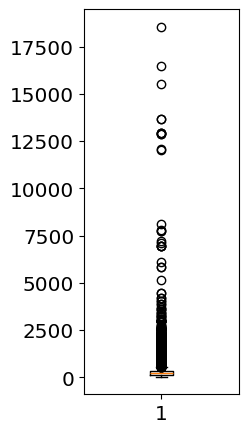

In [ ]:
rcParams['figure.figsize'] = 2, 5
plt.boxplot(europe['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7db3e50bfe80>,
 'caps': [<matplotlib.lines.Line2D at 0x7db3e50e4c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7db3e50bfa00>],
 'medians': [<matplotlib.lines.Line2D at 0x7db3e50e6350>],
 'fliers': [<matplotlib.lines.Line2D at 0x7db3e50e5ff0>],
 'means': []}

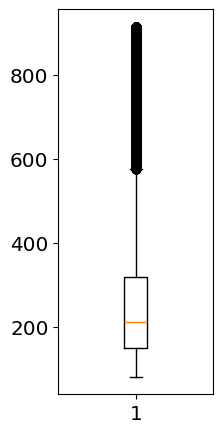

In [ ]:
from scipy.stats.mstats import winsorize
europe['price'] = winsorize(europe['price'], limits=[0.02, 0.02])
plt.boxplot(europe['price'])

In [ ]:
from scipy.stats.mstats import winsorize

columns_to_winsorize = ['person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall',
                        'dist', 'metro_dist', 'attr_index', 'attr_index_norm',
                        'rest_index', 'rest_index_norm']

for col in columns_to_winsorize:
    europe[col] = winsorize(europe[col], limits=[0.01, 0.01])

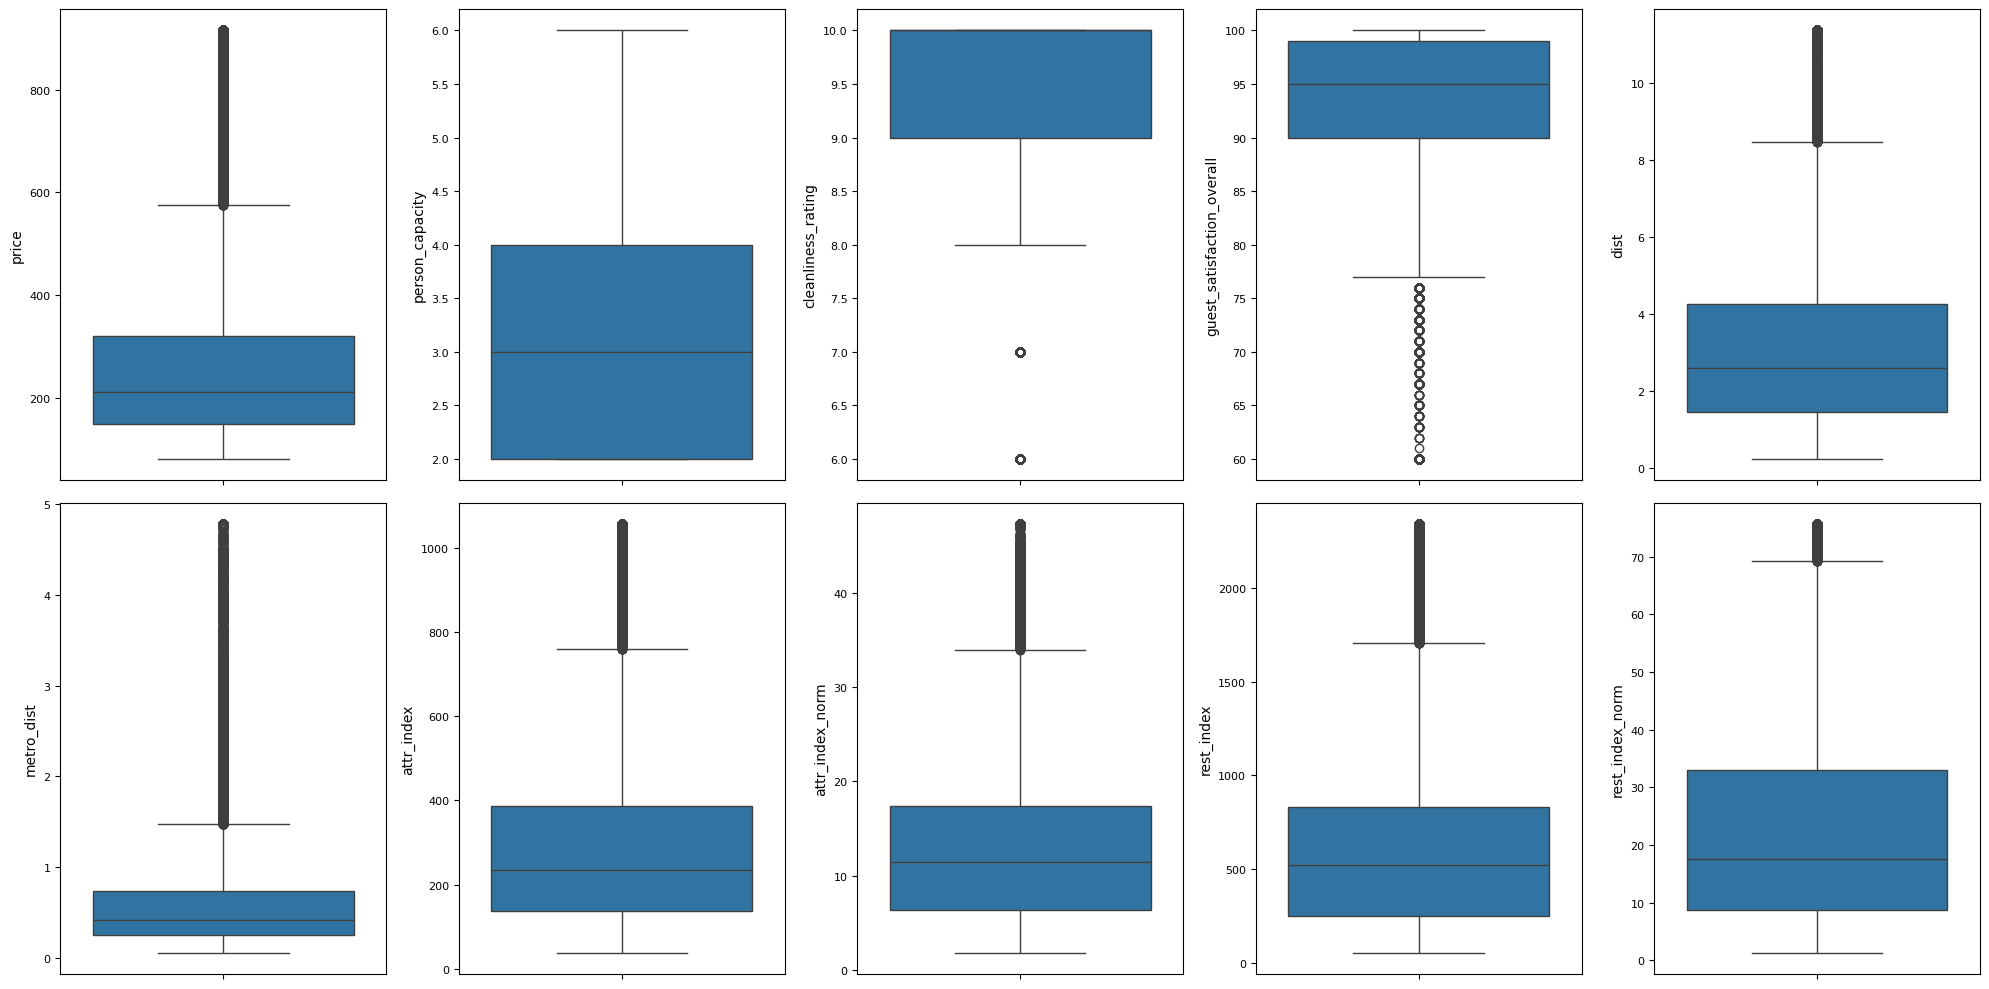

In [ ]:
features = ['price','person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm']
rcParams['figure.figsize'] = 20, 10
for i in range(0, len(features)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=europe[features[i]])
    plt.ylabel(features[i])
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tight_layout()

### Feature Encoding

In [ ]:
# Label Encoding
# Label Encoding pada room_shared, room_private, host_is_superhost
mapping_bool = {
    'True' : 1,
    'False' : 0,
}
europe['room_shared'] = europe['room_shared'].map(mapping_bool)
europe['room_private'] = europe['room_private'].map(mapping_bool)
europe['host_is_superhost'] = europe['host_is_superhost'].map(mapping_bool)
# Label Encoding pada weektime
mapping_week = {
    'weekends' : 1,
    'weekdays' : 0,
}
europe['week_time'] = europe['week_time'].map(mapping_week)

In [ ]:
# One Hot Encoding pada Feature City dan room_type
city_ohe = pd.get_dummies(europe['city'], prefix='kota').astype(int)
type_ohe = pd.get_dummies(europe['room_type']).astype(int)

In [ ]:
europe1 = pd.concat([europe, city_ohe, type_ohe], axis=1)
europe1.head()

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,kota_berlin,kota_budapest,kota_lisbon,kota_london,kota_paris,kota_rome,kota_vienna,Entire home/apt,Private room,Shared room
0,194.033698,Private room,0,1,2,0,1,0,10,93,...,0,0,0,0,0,0,0,0,1,0
1,344.245776,Private room,0,1,4,0,0,0,8,85,...,0,0,0,0,0,0,0,0,1,0
2,264.101422,Private room,0,1,2,0,0,1,9,87,...,0,0,0,0,0,0,0,0,1,0
3,433.529398,Private room,0,1,4,0,0,1,9,90,...,0,0,0,0,0,0,0,0,1,0
4,485.552926,Private room,0,1,2,1,0,0,10,98,...,0,0,0,0,0,0,0,0,1,0


## Feature Extraction

In [ ]:
#1. harga per kapasitas pengunjung
europe1['price_per_person'] = europe1['price'] / europe1['person_capacity']

#2. indikator aksesibilitas airbnb menuju pusat kota
def categorize_distance(dist):
    if dist < 5:
        return 'Central'
    elif dist <= 15:
        return 'Suburban'
    else:
        return 'Remote'

europe1['accessibility'] = europe1['dist'].apply(categorize_distance)

#3. kategori popularitas airbnb (high, medium, low) berdasarkan kepuasan pelanggan
def satisfaction_category(score):
    if score > 9:
        return 'High'
    elif score >= 7:
        return 'Medium'
    else:
        return 'Low'

europe1['satisfaction_level'] = europe1['guest_satisfaction_overall'].apply(satisfaction_category)
print(europe1.head())

        price     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room            0             1                2   
1  344.245776  Private room            0             1                4   
2  264.101422  Private room            0             1                2   
3  433.529398  Private room            0             1                4   
4  485.552926  Private room            0             1                2   

   host_is_superhost  multi  biz  cleanliness_rating  \
0                  0      1    0                  10   
1                  0      0    0                   8   
2                  0      0    1                   9   
3                  0      0    1                   9   
4                  1      0    0                  10   

   guest_satisfaction_overall  ...  kota_london  kota_paris  kota_rome  \
0                          93  ...            0           0          0   
1                          85  ...            0           0     

In [ ]:
europe1['accessibility'] = europe1['accessibility'].astype(str)
europe1['satisfaction_level'] = europe1['satisfaction_level'].astype(str)

In [ ]:
# Label Encoding pada accesbility
mapping_week = {
    'Central': 3,
    'Suburban': 2,
    'Remote': 1
}
europe1['accessibility'] = europe1['accessibility'].map(mapping_week)
# Label Encoding pada satisfaction_level
mapping_week = {
    'High': 3,
    'Medium': 2,
    'Low': 1
}
europe1['satisfaction_level'] = europe1['satisfaction_level'].map(mapping_week)

print(europe1.head())

        price     room_type  room_shared  room_private  person_capacity  \
0  194.033698  Private room            0             1                2   
1  344.245776  Private room            0             1                4   
2  264.101422  Private room            0             1                2   
3  433.529398  Private room            0             1                4   
4  485.552926  Private room            0             1                2   

   host_is_superhost  multi  biz  cleanliness_rating  \
0                  0      1    0                  10   
1                  0      0    0                   8   
2                  0      0    1                   9   
3                  0      0    1                   9   
4                  1      0    0                  10   

   guest_satisfaction_overall  ...  kota_london  kota_paris  kota_rome  \
0                          93  ...            0           0          0   
1                          85  ...            0           0     

####Kami memilih untuk membuat kolom tambahan di bawah ini dengan alasan sebagai berikut:
1. price_per_person: kolom baru guna menunjukkan berapa rata-rata harga per orang berdasarkan kapasitas orang (person_capacity)

2. accessibility : kolom baru yang digunakan untuk mengkategorikan lokasi airbnb menggunakan kolom dist dan metro_dist dengan klasifikasi:
"Central": Properti dekat pusat kota (jarak < 5 km).
"Suburban": Properti agak jauh dari pusat (5-15 km).
"Remote": Properti sangat jauh (> 15 km)

3. satisfaction_level : kolom baru yang digunakan untuk mengkategorikan properti berdasarkan tingkat kepuasan tamu, adapun indikator yang digunakan sebagai berikut: High: Skor > 9.
Medium: Skor 7-9.
Low: Skor < 7.

### Normalization/Standardization

#### Log Transformasi

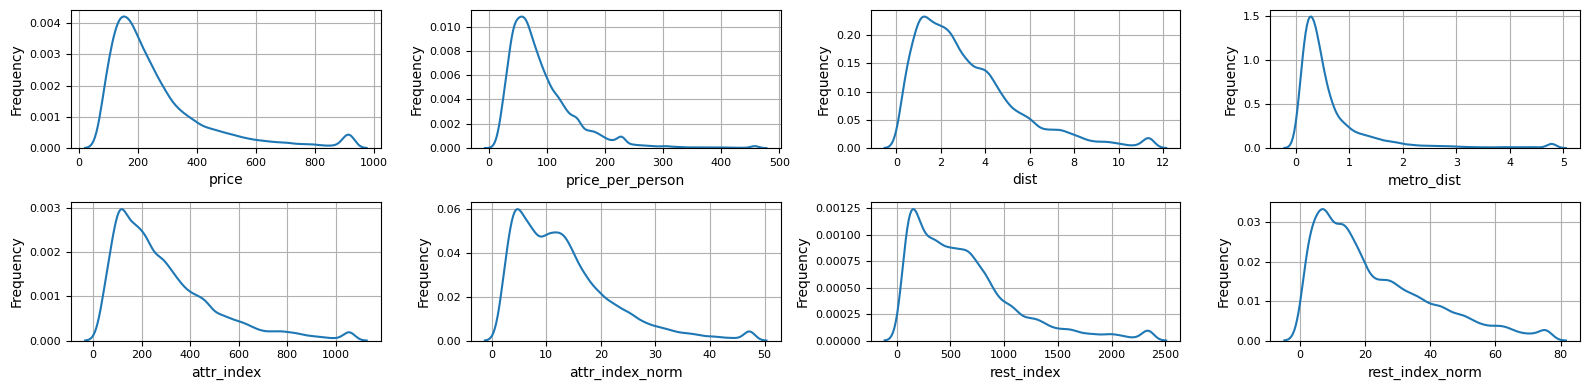

In [ ]:
before = ['price', 'price_per_person','dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm']
features = before
rcParams['figure.figsize'] = 16, 4
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=europe1[features[i]],)
    plt.xlabel(features[i])
    plt.ylabel('Frequency')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid()
    plt.tight_layout()
plt.savefig('before.png')

In [ ]:
# Melakukan Log Transformation pada Feature yang Right Skewed
europe1['log_price']=np.log(europe1['price'])
europe1['log_price_per_person']=np.log(europe1['price_per_person'])
europe1['log_dist']=np.log(europe1['dist'])
europe1['log_metro_dist']=np.log(europe1['metro_dist'])
europe1['log_attr_index']=np.log(europe1['attr_index'])
europe1['log_attr_index_norm']=np.log(europe1['attr_index_norm'])
europe1['log_rest_index']=np.log(europe1['rest_index'])
europe1['log_rest_index_norm']=np.log(europe1['rest_index_norm'])

In [ ]:
europe1.head()

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,accessibility,satisfaction_level,log_price,log_dist,log_metro_dist,log_attr_index,log_attr_index_norm,log_rest_index,log_rest_index_norm,log_price_per_person
0,194.033698,Private room,0,1,2,0,1,0,10,93,...,Suburban,High,5.268032,1.614020,0.931920,4.365521,1.427126,4.587555,1.923734,0.419093
1,344.245776,Private room,0,1,4,0,0,0,8,85,...,Central,High,5.841356,-0.716642,-1.429603,6.447585,3.509191,6.730159,4.066338,0.401484
2,264.101422,Private room,0,1,2,0,0,1,9,87,...,Suburban,High,5.576333,1.748906,1.295171,4.321160,1.382765,4.557942,1.894121,0.461088
3,433.529398,Private room,0,1,4,0,0,1,9,90,...,Central,High,6.071960,-0.954870,-0.821262,6.201062,3.262667,6.774262,4.110440,0.434705
4,485.552926,Private room,0,1,2,1,0,0,10,98,...,Central,High,6.185288,-0.607450,-1.143528,6.315051,3.376656,6.703563,4.039742,0.532578


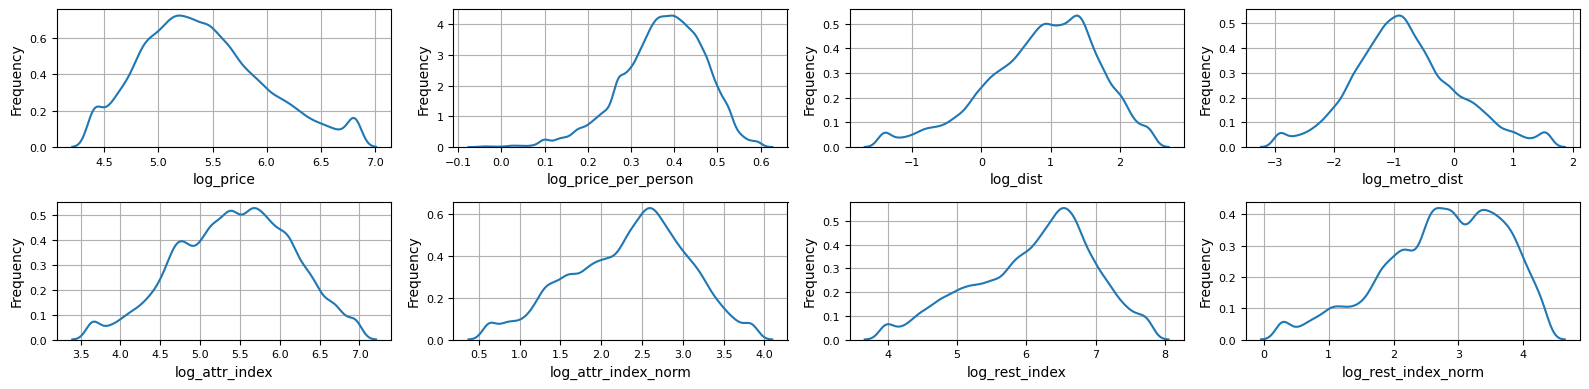

In [ ]:
log_transformation = ['log_price', 'log_price_per_person','log_dist', 'log_metro_dist', 'log_attr_index', 'log_attr_index_norm', 'log_rest_index', 'log_rest_index_norm']
features = log_transformation
rcParams['figure.figsize'] = 16, 4
for i in range(0, len(features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=europe1[features[i]],)
    plt.xlabel(features[i])
    plt.ylabel('Frequency')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid()
    plt.tight_layout()
plt.savefig('after.png')

### Standarisasi

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
europe1[['person_capacity','cleanliness_rating', 'guest_satisfaction_overall']] = scaler.fit_transform(europe1[['person_capacity','cleanliness_rating', 'guest_satisfaction_overall']])

In [ ]:
europe1.head()

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,lat,week_time,city,log_price,log_dist,log_metro_dist,log_attr_index,log_attr_index_norm,log_rest_index,log_rest_index_norm
0,194.033698,Private room,False,True,-0.894595,False,1,0,0.693578,0.023331,...,52.41772,weekdays,amsterdam,5.268032,1.614020,0.931920,4.365521,1.427126,4.587555,1.923734
1,344.245776,Private room,False,True,0.645605,False,0,0,-1.655387,-0.995795,...,52.37432,weekdays,amsterdam,5.841356,-0.716642,-1.429603,6.447585,3.509191,6.730159,4.066338
2,264.101422,Private room,False,True,-0.894595,False,0,1,-0.480905,-0.741014,...,52.36103,weekdays,amsterdam,5.576333,1.748906,1.295171,4.321160,1.382765,4.557942,1.894121
3,433.529398,Private room,False,True,0.645605,False,0,1,-0.480905,-0.358841,...,52.37663,weekdays,amsterdam,6.071960,-0.954870,-0.821262,6.201062,3.262667,6.774262,4.110440
4,485.552926,Private room,False,True,-0.894595,True,0,0,0.693578,0.660285,...,52.37508,weekdays,amsterdam,6.185288,-0.607450,-1.143528,6.315051,3.376656,6.703563,4.039742


In [ ]:
europe1.sample(5)

,price,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,...,lat,week_time,city,log_price,log_dist,log_metro_dist,log_attr_index,log_attr_index_norm,log_rest_index,log_rest_index_norm
37913,468.123777,Entire home/apt,0,0,-0.894595,0,0,1,0.693578,-4.180566,...,48.86034,1,paris,6.148733,0.423640,-2.639731,5.774166,2.750550,6.724227,3.647986
49598,115.933899,Private room,0,1,-0.124495,0,0,0,-0.480905,-0.486232,...,48.19988,0,vienna,4.753020,0.325745,-1.191567,5.453543,2.817103,5.764860,2.031223
18983,413.696060,Entire home/apt,0,0,2.185805,0,0,0,0.693578,0.915067,...,38.73101,0,lisbon,6.025132,0.726835,-0.693801,4.789101,1.378286,5.858725,2.751474
9645,201.317290,Private room,0,1,-0.894595,0,1,0,0.693578,0.150722,...,41.38731,1,barcelona,5.304882,-1.155807,-1.563742,6.600890,3.346676,7.282507,3.464277
4339,155.367563,Entire home/apt,0,0,0.645605,0,0,1,0.693578,0.915067,...,37.97301,0,athens,5.045794,-1.011646,-1.099857,5.695259,2.417274,6.186641,3.597521


### Handle Class Imbalance

Terdapat class imbalance pada feature room_type dengan values shared rooms jauh berbeda dengan kedua values. Namun, class imbalance tidak di handle

## Feature Engineering

### Feature Selection

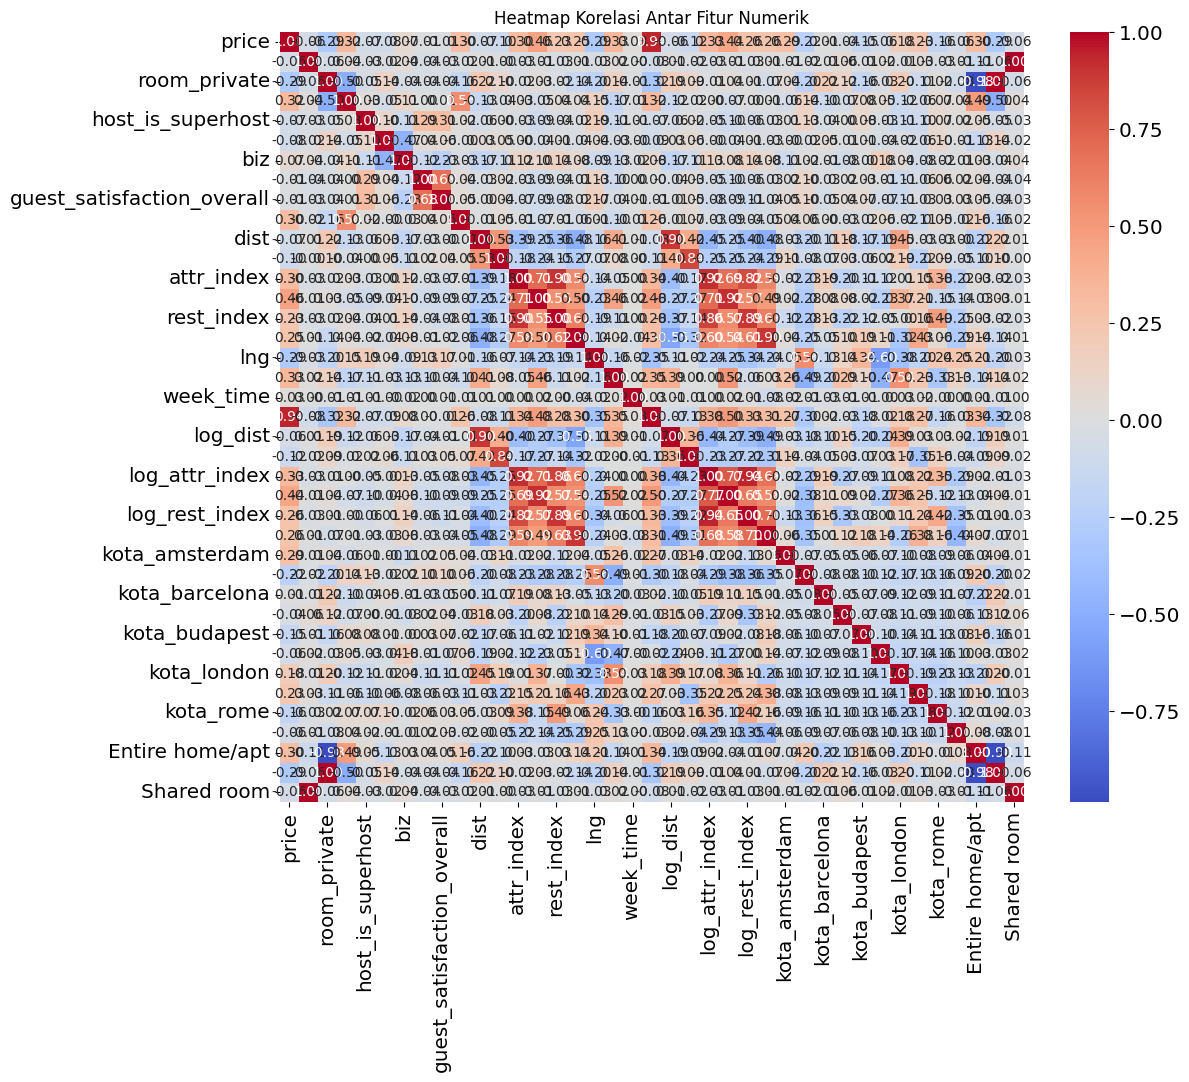

Fitur redundan berdasarkan korelasi tinggi: [('log_price', 'price'), ('Shared room', 'room_shared'), ('Entire home/apt', 'room_private'), ('Private room', 'room_private'), ('rest_index', 'attr_index'), ('log_attr_index', 'attr_index'), ('log_attr_index_norm', 'attr_index_norm'), ('attr_index', 'rest_index'), ('price', 'log_price'), ('attr_index', 'log_attr_index'), ('log_rest_index', 'log_attr_index'), ('attr_index_norm', 'log_attr_index_norm'), ('log_attr_index', 'log_rest_index'), ('room_private', 'Entire home/apt'), ('Private room', 'Entire home/apt'), ('room_private', 'Private room'), ('Entire home/apt', 'Private room'), ('room_shared', 'Shared room')]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#hitung korelasi antar fitur numerik
numerical_data = europe1.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

#visualisasi korelasi antar fitur
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()

#mencari pasangan fitur dengan korelasi sangat tinggi (> 0.9)
redundant_pairs = []
threshold = 0.9
for col in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if col != row and abs(correlation_matrix.loc[row, col]) > threshold:
            redundant_pairs.append((row, col))
print("Fitur redundan berdasarkan korelasi tinggi:", redundant_pairs)


## Analisa Korelasi

In [ ]:
#korelasi fitur numerik dengan target
target_corr = correlation_matrix['price'].sort_values(ascending=False)
print("Korelasi dengan target (prices):")
print(target_corr)

#memilih fitur dengan korelasi rendah (< 0.1)
low_correlation_features = target_corr[abs(target_corr) < 0.1].index
print("Fitur dengan relevansi rendah untuk target:", list(low_correlation_features))


Korelasi dengan target (prices):
price                         1.000000
log_price                     0.941554
attr_index_norm               0.456134
log_attr_index_norm           0.438316
lat                           0.334161
log_attr_index                0.326295
person_capacity               0.321576
attr_index                    0.303025
bedrooms                      0.298911
Entire home/apt               0.297667
kota_amsterdam                0.289152
log_rest_index                0.264622
log_rest_index_norm           0.255537
rest_index_norm               0.251660
kota_paris                    0.234935
rest_index                    0.232708
kota_london                   0.182198
biz                           0.072906
week_time                     0.026695
kota_barcelona                0.013464
cleanliness_rating           -0.006530
guest_satisfaction_overall   -0.011361
kota_berlin                  -0.038926
kota_vienna                  -0.055092
kota_lisbon                  -0

Berdasarkan hasil analisa tersebut maka kami menyarankan untuk membuang feature attr_index_norm, rest_index_norm, log_attr_index_norm, log_rest_index_norm karena  memiliki korelasi sangat tinggi (dengan threshold di atas 0.9) dan berpotensi sebagai redundan. Tak hanya itu, kami juga akan membuang fitur week_time karena tidak langsung memberikan dampak pada model prediksi harga.

Karena tujuan kami adalah mengembangkan model yang mampu memberikan rekomendasi harga berdasarkan fitur yang host miliki, maka kami akan fokus pada fitur person_capacity. cleanliness_rating, guest_satisfaction_overall, dist dan metro_dist, room_type, room_shared, dan room_private, city.